In [1]:
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

sp.__version__

'1.14.1'

---
###  Брахистохрона
Задача о нахождении кривой наискорейшего спуска, или *брахистохроны*, состоит в том, чтобы найти такую форму горки, чтобы время скатывания  по ней тела без трения было минимальным. 

![SegmentLocal](https://upload.wikimedia.org/wikipedia/commons/6/63/Brachistochrone.gif)

Известно, что решение этой задачи - трансцедентная кривая, называемая [циклоидой](https://ru.wikipedia.org/wiki/%D0%A6%D0%B8%D0%BA%D0%BB%D0%BE%D0%B8%D0%B4%D0%B0). Кроме того, что это кривая минимизирует время спуска, она является траекторией точки на границе катящейся окружности, время спуска по этой кривой не зависит от начального положения, а еще маятник в часах имеет циклоидальный ограничитель, благодаря чему частота его колебаний не зависит от амплитуды.

Она была поставлена Иоганном Бернулли в 1696 году. Разные решения предлагали Исаак Ньютон, Якоб Бернулли, Г. В. Лейбниц, Г. Ф. Лопиталь, Э. В. Чирнхаус. Скорее всего, вы уже находили ее на курсе по вариационному исчислению, минимизируя значение какого-то там интеграла. Здесь же предлагается приблизить брахстохрону при помощи функционала scipy.optimize.

Самый простой способ построить брахистохрону - параметризовать ее (вывод формул из закона сохранения энергии можно найти [тут](https://en.wikipedia.org/wiki/Brachistochrone_curve#Indirect_method)
$$x = r \theta - r\sin \theta $$
$$y = r - r\cos  \theta$$

Т.е. мы хотим найти такие $\theta$ и $r$, что соответсвущая дуга циклоиды соединяет концы нашей горки.

**Как будем решать такую задачу?**

In [2]:
from scipy import optimize

HEIGHT = 13
WIDTH = 37


# Находим \theta и r
def cycl(theta):
    return (1 - np.cos(theta)) / (theta - np.sin(theta)) - HEIGHT / WIDTH


# r = 1.0
theta = sp.optimize.root(cycl, 0.001)
theta = theta.x[0]
# theta

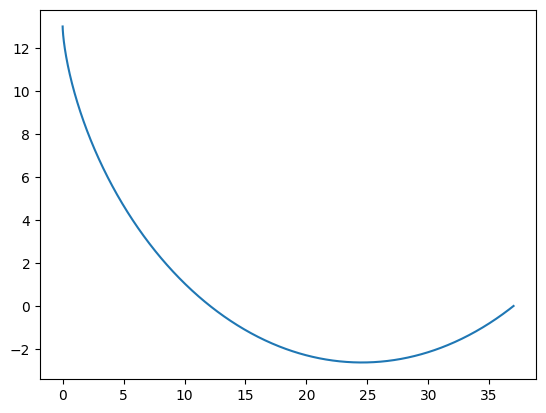

In [3]:
# отрисуем правильный ответ:
fig = plt.figure()
ax = fig.add_subplot(111)

r = HEIGHT / (1 - np.cos(theta))

ts = np.linspace(0, theta, 1000)
sol_xs = r * (ts - np.sin(ts))
sol_ys = HEIGHT - r * (1 - np.cos(ts))

ax.plot(sol_xs, sol_ys)
fig.canvas.draw()
plt.show(block=False)

### Задача 3: Брахистохрона (1 балл)

В классе мы находили брахистохрону через параметризацию соответсвубщей дуги циклоиды. Ключевым здесь было то, что мы заранее знали, в каком виде искать ответ, что, к сожалению, далеко не всегда случается в реальной жизни. В этой задаче вам нужно будет построить кусочно-динейное приближение брахистохроны, не пользуясь явными формулами для ее формы. Другими словами, напишите функционал, который под данным высотам точек вычисляет время спуска, -- и минимизируйте этот функционал средствами scipy.

In [4]:
# NB. Паметры горки и правильный ответ находятся выше - вы можете поменять их на свое усмотрение.
NUM_POINTS = 50
dx = WIDTH / (NUM_POINTS - 1)
xs = np.linspace(0, WIDTH, NUM_POINTS)

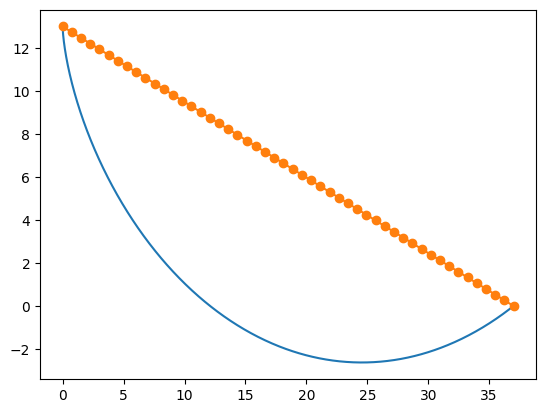

In [5]:
def draw(ys):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(sol_xs, sol_ys)
    (li,) = ax.plot(xs, ys, marker="o")


# инициализируем горку прямой
ys = np.linspace(HEIGHT, 0, NUM_POINTS)
draw(ys)

In [6]:
def get_time(ys):
    """
    :param ys: heigths of our points
    :return: total time
    """
    time = 0
    g = 9.81
    for i in range(NUM_POINTS - 1):
        h1 = HEIGHT - ys[i]
        h2 = HEIGHT - ys[i + 1]
        v1 = np.sqrt(2 * g * h1)
        v2 = np.sqrt(2 * g * h2)
        vsr = (v1 + v2) / 2
        time += np.sqrt(dx**2 + (ys[i] - ys[i + 1]) ** 2) / vsr
    return time


get_time(ys)

4.91119282308311

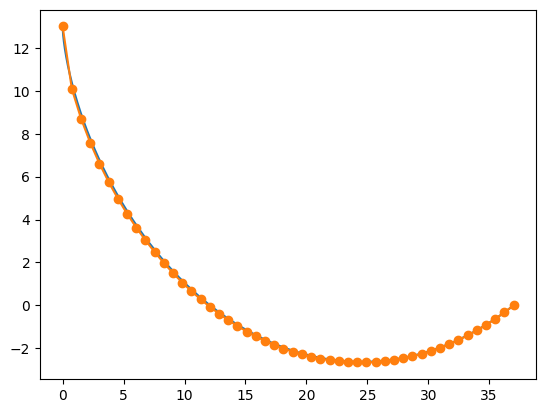

In [7]:
# Bounds: we can not move the first and the last points
bounds = (
    [(HEIGHT, HEIGHT)]
    + [(-float("inf"), float("inf")) for _ in range(NUM_POINTS - 2)]
    + [(0, 0)]
)

# Run the optimization


result = sp.optimize.minimize(get_time, ys, bounds=bounds)


draw(result.x)

In [8]:
get_time(ys), get_time(result.x)

(4.91119282308311, 3.565472659787059)

---

This notebook is basen on Anton Alekseev's practical lessons at MCS SPBU and [this](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-3-Scipy.ipynb)